### Aditya Raj Sahoo

### GRIP - The Sparks Foundation

### Data Science & Business Analytics Intern

### Task2: Prediction using Unsupervised Machine Learning

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [46]:
#Importing all the required Basic Libraries and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#Importing all the required Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans

### About the dataset
The dataset consists of three species of Iris Flowers that are Setosa, Versicolor and Virginica and gives information on 4 features of these three species - SepalLength, SepalWidth, PetalLength and PetalWidth. The task to apply K Mean algorithm and divide the flowers into different clusters based on the features.

In [48]:
#Importing the Dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
# showcasing data to first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
# statistical info
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [51]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

### Preprocessing the dataset

In [53]:
# check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [54]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Species']

In [55]:
# checking the number of columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [56]:
# Since ID attribute won't be used, we can remove it for better analysis
df = df.drop('Id', 1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [57]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Species
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64



### Exploratory Data Analysis

### Distribution of the attributes using Histogram

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

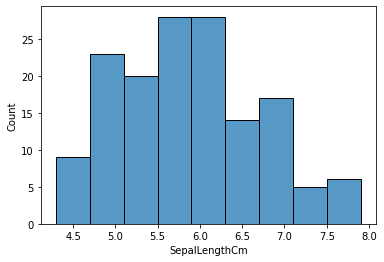

In [58]:
sns.histplot(df['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

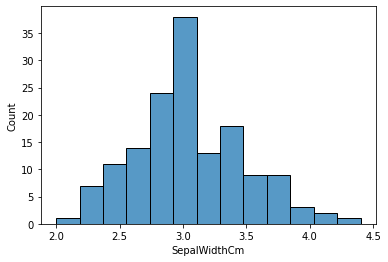

In [59]:
sns.histplot(df['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

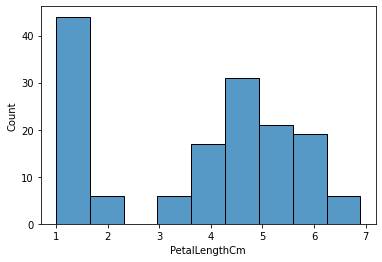

In [60]:
sns.histplot(df['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

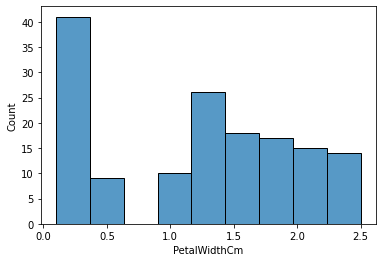

In [61]:
sns.histplot(df['PetalWidthCm'])

<AxesSubplot:xlabel='Species', ylabel='Count'>

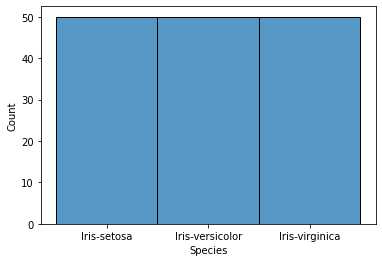

In [62]:
sns.histplot(df['Species'])

In [69]:
# Coorelation Matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

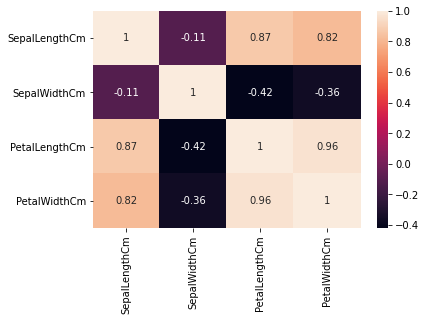

In [70]:
corr = df.corr()
sns.heatmap(corr, annot=True)

### Data visualization

### Pair Plots

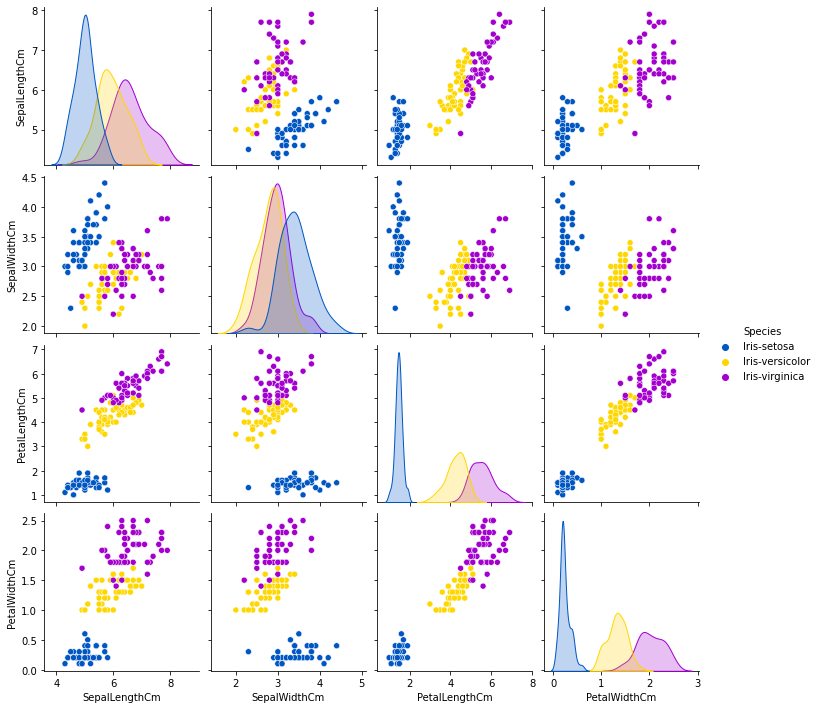

In [72]:
# A pairwise relationships in a datase. 
sns.pairplot(data = df, palette="prism",hue='Species' )
plt.show()

### Violin Plots
A violin plot depicts distributions of numeric data for one or more groups using density curves.

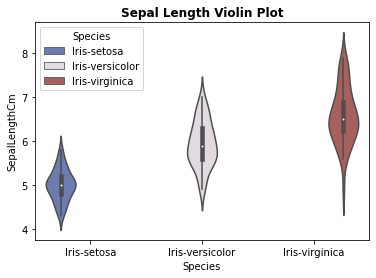

In [76]:
# Sepal Length
sns.violinplot(x = df.Species, y = df.SepalLengthCm, hue = df.Species, palette="twilight_shifted")
plt.title("Sepal Length Violin Plot", fontweight = "bold")
plt.show()

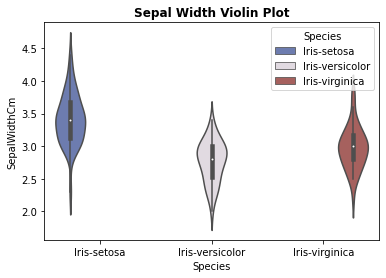

In [77]:
# Sepal Width
sns.violinplot(x = df.Species, y = df.SepalWidthCm, hue = df.Species, palette="twilight_shifted")
plt.title("Sepal Width Violin Plot", fontweight = "bold")
plt.show()

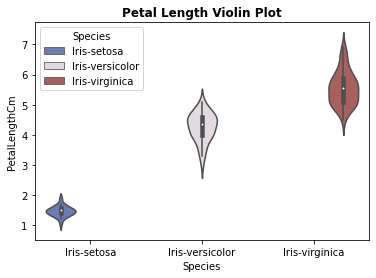

In [79]:
# Petal Length
sns.violinplot(x = df.Species, y = df.PetalLengthCm, hue = df.Species, palette="twilight_shifted")
plt.title("Petal Length Violin Plot", fontweight = "bold")
plt.show()

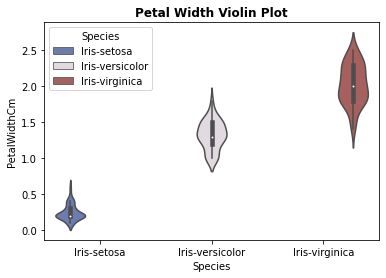

In [80]:
# Petal Width
sns.violinplot(x = df.Species, y = df.PetalWidthCm, hue = df.Species, palette="twilight_shifted")
plt.title("Petal Width Violin Plot", fontweight = "bold")
plt.show()

In [92]:
# Separating the attributes and target
inputdata = df.iloc[:, :-1]
outputdata = df.Species.to_frame()

In [93]:
inputdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
outputdata.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [96]:
# To find the right number of clusters
n_clus = list(range(1, 10))
inertia_list = []

for i in n_clus:
    model_i = KMeans(n_clusters= i, init='k-means++', max_iter=300)
    model_i.fit(inputdata)
    inertia_list.append(model_i.inertia_)
    
clust_df = pd.DataFrame(n_clus, columns=['Number of Clusters'])
inert_list_df = pd.DataFrame(inertia_list, columns=['WCSS'])

inertia_df = pd.concat([clust_df, inert_list_df], axis = 1)
inertia_df.head(10)

,Number of Clusters,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,39.197083
6,7,34.204568
7,8,30.641786
8,9,27.887387


### Elbow Method
The elbow method runs k-means clustering on the dataset for a range of values for k

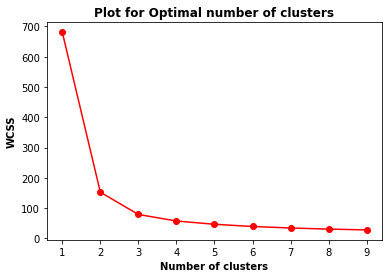

In [103]:
# Ploting elbow curve to find the no. of cluster ---
# WCSS is the sum of squared distance between each point and the centroid in a cluster.
plt.plot(n_clus, inertia_list, c = "red", marker= "o", )
plt.xlabel("Number of clusters",fontweight = "bold" )
plt.ylabel("WCSS",fontweight = "bold")
plt.title("Plot for Optimal number of clusters", fontweight = "bold")
plt.show()

### K Mean

In [104]:
k_means_model = KMeans(n_clusters=3)

k_means_model.fit(inputdata)

pred_means =k_means_model.fit_predict(inputdata)

In [105]:
df['Cluster'] = pred_means

### Finding Centroid for each cluster
Before visualizing the clusters, we first have to find the centroid for each cluster

In [106]:
c = np.array(k_means_model.cluster_centers_)
centroids = pd.DataFrame(c)
centroids

,0,1,2,3
0,5.006000,3.418000,1.464000,0.244000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


### Visualising Centroids

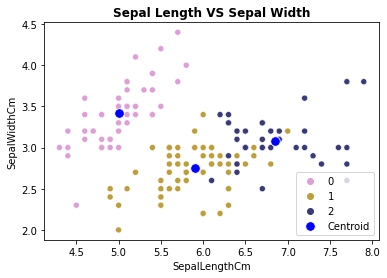

In [108]:
sns.scatterplot(x= inputdata.SepalLengthCm, y = inputdata.SepalWidthCm, hue = df.Cluster,
               marker = "o", palette="tab20b_r")
sns.scatterplot(x = c[:,0], y = c[:,1], marker= "o", color = "b", s = 90 ,label = "Centroid")
plt.title("Sepal Length VS Sepal Width", fontweight = "bold")
plt.show()